In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

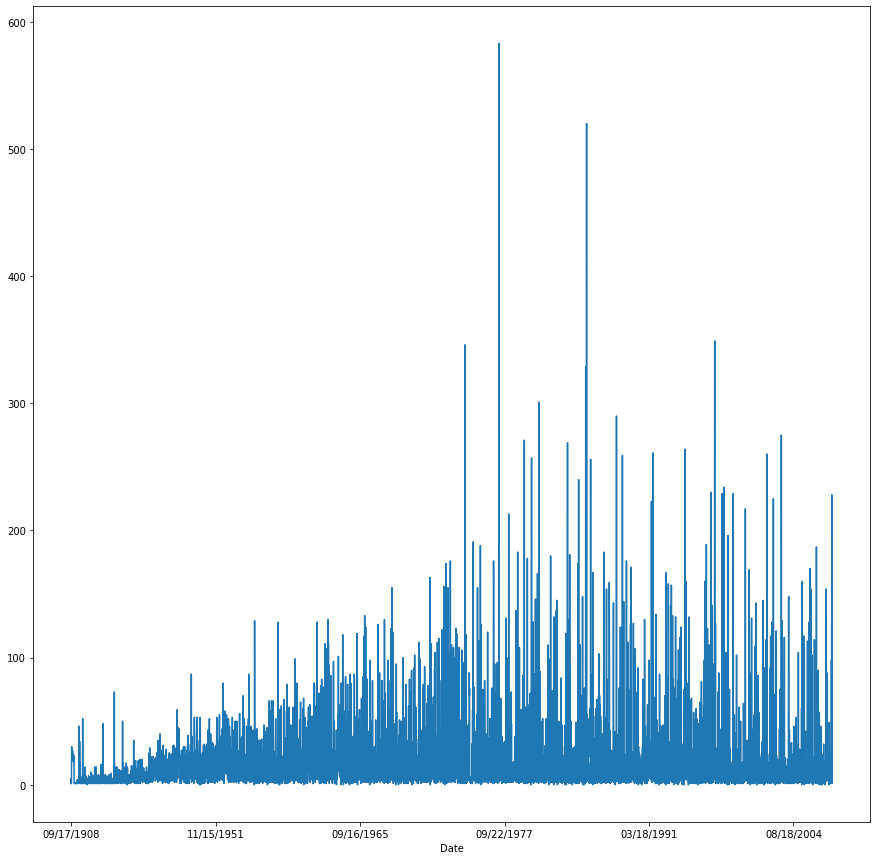

In [ ]:
data = pd.read_csv("currency.csv", index_col='Time')
plt.figure(figsize = (15,15))
df.plot()

In [ ]:
data

,GEMS_GEMS_SPENT
Time,
5/1/17,1199436
5/2/17,1045515
5/3/17,586111
5/4/17,856601
5/5/17,793775
...,...
2/20/18,2166449
2/21/18,1552313
2/22/18,2175548


In [ ]:
data_dict = {}
from statsmodels.tsa.stattools import acf, pacf

for i in range(2, data.shape[0], 2):
  data_dict[str(data.index[i])] = acf(data[i:i+100], nlags=1)[1]

NameError: ignored

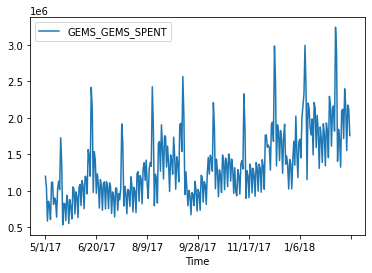

In [ ]:
pd.DataFrame(data).plot()

ACF показывает статистическую связь между значениями временного ряда.

Проврим стационарность ряда. Нулевая гипотеза: существует единичный корень, с альтернативой, что единичного корня нет. Если pvalue выше критического размера, мы не можем отрицать наличие единичного корня.

In [ ]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(data)
if test[0]> test[4]['5%']:
  print ('Не стационарен')
else:
  print ('Стационарен')

Не стационарен


p-value ниже нашего уровня значимости в 5%, значит мы отрицаем нулевую гипотезу. Ряд нестационарен

In [ ]:
statsmodels.tsa.stattools.adfuller(data)

(-1.8160113962891011,
 0.37254195189457995,
 14,
 285,
 {'1%': -3.4535050041524245,
  '5%': -2.8717352599720294,
  '10%': -2.5722024776854417},
 7806.255567542669)

In [ ]:
def herst(data):
    log_RS = []
    log_N = []
    Range_of_lags = range(2, 300, 2)
    for i in Range_of_lags:
      arr=[]
      for j in range(2, len(data)-i, i):
            new_data = data[j : j+i]
            S = new_data.std()
            R = new_data.max() - new_data.min()
            arr.append(R/S)
      log_RS.append(np.log(sum(arr)/len(arr)))
      log_N.append(np.log(i))
      ans = np.polyfit(log_N,log_RS,1)
    return ans

In [ ]:
herst(data.GEMS_GEMS_SPENT)

<ipython-input-99-b971e01dd3f1>:1: RankWarning: Polyfit may be poorly conditioned
  herst(data.GEMS_GEMS_SPENT)


array([0.28380743, 0.45711801])